# Exercise 08.4 (crime reports by location)


### Background

The task is to produce a crime report data plot in the neighborhood of Cambridge colleges, by reported crime
category.

We can get crime data in the UK from the police data systems using what is known as a REST API,
and turn the data into a list of Python dictionaries. Each entry in the list is a police report 
(an entry is a Python dictionary detailing the report).

The first step is the import the modules we will be using:

In [1]:
# Import modules for API requests
import json
import requests

# Import pretty print module
import pprint

# Import modules for plotting
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Import module for 3d plotting
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

# Plot inline in Jupyter notebook
%matplotlib inline

The service https://data.police.uk has an interface where we can add specific strings to the URL (web address) to define what data we are intersted in, and the police server will return our requested data. The format is

    https://data.police.uk/api/crimes-street/all-crime?poly=[LAT0],[LON0]:[LAT1],[LON1]:[LAT2,LON2]&date=YYYY-MM
    
This returns crimes reports in the triangle given by the three geographic coordinate points `(latitude0, longitude0), (latitude1, longitude1) and (latitude2, longitude2)`, for the month `YYYY-MM`.  

In [2]:
def get_data(triangle, time):
    """ Collect frequencies for various categories of crimes for a given location and year-month time-frame
    
        Arguments:
            triangle: a list of 3 strings (p0, p1, p2)
                      each string consists of a long, lat combination separated by a comma (no space)
            time: the year-month of interest for the crime data (entered in YYYY-MM format)
            
        Returns:
            a dictionary of frequencies for each category from the https://data.police.uk API
            key: category name (string), value: frequency (integer)
    """
    # Construct request URL string from input data
    p0, p1, p2 = triangle[0], triangle[1], triangle[2]
    url = 'https://data.police.uk/api/crimes-street/all-crime?poly=' + p0 + ':' + p1 + ':' + p2 + '&date=' + time

    # Fetch data from https://data.police.uk
    r = requests.get(url)
    
    # Convert fetched data into list of dictionaries
    crime_data = r.json()
    
    # Create an empty dictionary, which will eventually map the report category to the number of incidents:
    categories_freq = {}

    # Iterate over all reports in the list
    for report in crime_data:
        # Get category type from the report
        category = report['category']

        if category in categories_freq:
            # increment associated counter
            categories_freq[category] += 1
        else:
            # add key to dictionary and associate the value 1
            categories_freq[category] = 1
            
    # Return categories_freq
    return categories_freq

Below we create this URL string to include a large part of the Cambridge city centre (Google Maps is a handy way to get the geographic coordinates).

In [3]:
# A triangle that includes most of the Cambridge city centre
# (long, lat) for three vertices of a triangle (no spaces!)
p0 = '52.211546,0.116465'
p1 = '52.203510,0.145500'
p2 = '52.189730,0.113050'
city_centre = [p0, p1, p2]

# year-month of interest
May2016 = '2016-05'

# Extract data for Cambridge city centre for May 2016
city_centre_May2016 = get_data(city_centre, May2016)

# Pretty print result of search
pprint.pprint(city_centre_May2016)

{'anti-social-behaviour': 96,
 'bicycle-theft': 83,
 'burglary': 12,
 'criminal-damage-arson': 13,
 'drugs': 17,
 'other-crime': 2,
 'other-theft': 35,
 'possession-of-weapons': 4,
 'public-order': 13,
 'robbery': 2,
 'shoplifting': 47,
 'theft-from-the-person': 22,
 'vehicle-crime': 3,
 'violent-crime': 52}


### Task


Produce a bar chart of the number of reports in different categories. Run your program for different parts of Cambridge, and for different months and years.

#### Note: My apologies to Cambridge for my rough guesses and estimations of area boundaries for this assignment!

In [4]:
def plot_frequencies(crime_data, place, time):
    """ Create bar plot for given set of crime frequencies
        
        Arguments:
            crime_data: set of frequencies for categories of criminal activity (dictionary)
            place: where activities took place (string)
            time: when activities took place (string)
    """
    # Create an array with the position of each bar along the x-axis, e.g [0, 1, 2, 3, 4] 
    x_pos = np.arange(len(crime_data.keys()))

    # Produce bar plot
    plt.bar(x_pos, crime_data.values(), align='center');

    # Replace the x ticks with the category name, and rotate labels to vertical position
    plt.xticks(x_pos, crime_data.keys(), rotation='vertical')

    # Add y axis label
    plt.title("Criminal activity in {} in {}".format(place, time))
    plt.ylabel('number of incidents');

### Places (holding year_month constant as May 2016):

   1. Cambridge City Centre (as described in Excercise)
   1. Cambridge Science Park (and surrounding area)
   1. Cambridge Airport District (area near airport)

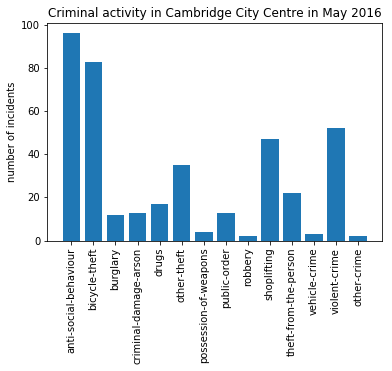

In [5]:
# Place 1: Cambridge City Centre
plot_frequencies(city_centre_May2016, "Cambridge City Centre", "May 2016")

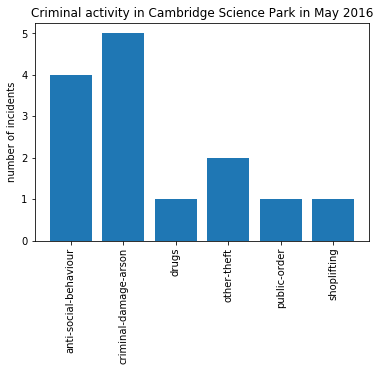

In [6]:
# Place 2: Cambridge Science Park (and surrounding area)
p0 = '52.240953,0.140606'
p1 = '52.229389,0.132882'
p2 = '52.228863,0.156227'
science_park = [p0, p1, p2]

# Extract data for Cambridge Science Park for May 2016
science_park_May2016 = get_data(science_park, May2016)

# Plot data for Cambridge Science Park
plot_frequencies(science_park_May2016, "Cambridge Science Park", "May 2016")

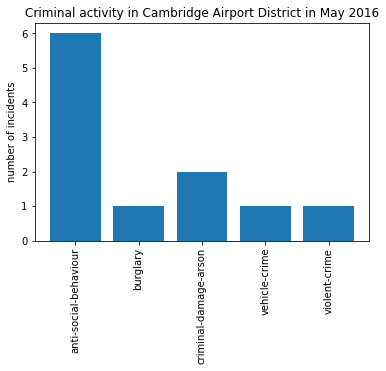

In [7]:
# Place 3: District near Cambridge Airport
p0 = '52.217611,0.160691'
p1 = '52.207409,0.149189'
p2 = '52.202043,0.159489'
airport = [p0, p1, p2]

# Extract data for Cambridge Airport District for May 2016
airport_May2016 = get_data(airport, May2016)

# Plot data for Cambridge Airport District
plot_frequencies(airport_May2016, "Cambridge Airport District", "May 2016")

### Times (holding place constant as Cambridge City Centre):

   1. January 2011
   1. January 2015
   1. January 2017

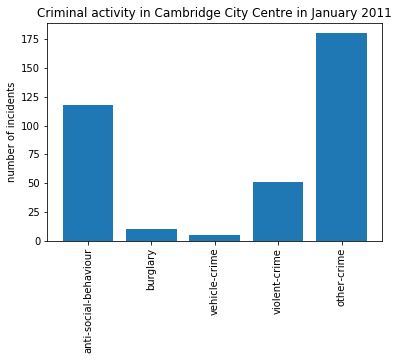

In [8]:
# Time 1: January 2011
Jan2011 = '2011-01'

# Extract data for Cambridge city centre for January 2011
city_centre_Jan2011 = get_data(city_centre, Jan2011)

# Plot data for Cambridge city centre
plot_frequencies(city_centre_Jan2011, "Cambridge City Centre", "January 2011")

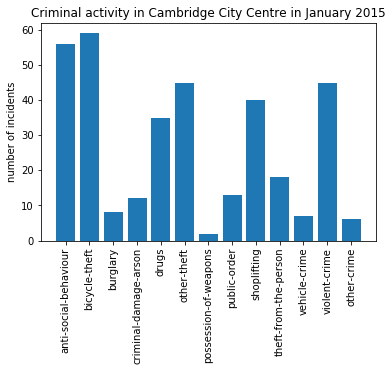

In [9]:
# Time 2: January 2015
Jan2015 = '2015-01'

# Extract data for Cambridge city centre for January 2015
city_centre_Jan2015 = get_data(city_centre, Jan2015)

# Plot data for Cambridge city centre
plot_frequencies(city_centre_Jan2015, "Cambridge City Centre", "January 2015")

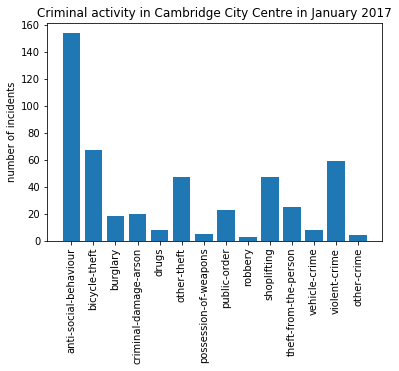

In [10]:
# Time 3: January 2017
Jan2017 = '2017-01'

# Extract data for Cambridge city centre for January 2017
city_centre_Jan2017 = get_data(city_centre, Jan2017)

# Plot data for Cambridge city centre
plot_frequencies(city_centre_Jan2017, "Cambridge City Centre", "January 2017")

### Extensions (optional)

1. Probe the retrieved data to build a set of all crime categories in the data set.
2. Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident 
   types over time.

### Extension 1: Probe the retrieved data to build a set of all crime categories in the data set.

In [11]:
# Create function to return set of crime categories in data set
def get_category_set(crime_data):
    """ For a dictionary of crime data, build a set of categories in the data set """
    return set(crime_data.keys())
    
# Test function on Cambridge city center data in May 2016
set_May2016_city_centre = get_category_set(city_centre_May2016)
pprint.pprint(set_May2016_city_centre)

{'anti-social-behaviour',
 'bicycle-theft',
 'burglary',
 'criminal-damage-arson',
 'drugs',
 'other-crime',
 'other-theft',
 'possession-of-weapons',
 'public-order',
 'robbery',
 'shoplifting',
 'theft-from-the-person',
 'vehicle-crime',
 'violent-crime'}


### Extension 2: Explore the temporal (time) aspect of the data. Thinks of ways to represent the change in reported incident types over time.

According to the source information (https://data.police.uk/about/), data is available from December 2010 to April 2017. For temporal plotting, I will first extract data across the time span for the Cambridge city centre for 2011 through 2016 into a dictionary of dictionaries where the keys are the year-months and the values are the crime frequencies.

In [12]:
# Define months and years structures for looping 
months = np.arange(1, 12, 1)
years = np.arange(2011, 2017, 1)

# Construct dictionary of dictionaries
crime_trends = {}
for year in years:
    for month in months:
        time = "{}-{:02}".format(year, month)
        crimes = (get_data(city_centre, time))
        crime_trends[time] = crimes

Next, I will extract the list of crimes reported at any point across this time span and create a matrix in which a value stands for the number of crimes reported at a given month for a particular category (or a 0 for a non-reported category).

In [13]:
# Full set of categories
categories = set()
for time in crime_trends:
    key_set = get_category_set(crime_trends[time])
    categories.update(key_set)
categories = list(categories)

# Full set of times
times = list(crime_trends.keys())

# Create matrix of crime data (rows represent categories, columns represent times)
crime_matrix = []
for category in categories:
    crime_vector = []
    for time in crime_trends:
        try:
            frequency = crime_trends[time][category]
            crime_vector.append(frequency)
        except:
            frequency = 0
            crime_vector.append(frequency)
    crime_matrix.append(crime_vector)

Create a line plot of a specified category (anti-social-behaviour) over time

shoplifting


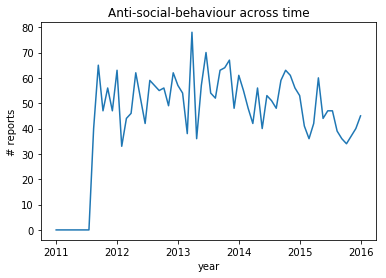

In [14]:
# Extract data for anti-social-behaviour
print(categories[12])
anti_social_behaviour = crime_matrix[12]

# Plot data across time
x_pos = np.arange(len(times))
plt.plot(x_pos, anti_social_behaviour)
plt.xticks(np.linspace(x_pos[0], x_pos[-1], len(years)), years)
plt.xlabel('year')
plt.ylabel('# reports')
plt.title('Anti-social-behaviour across time');